In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=yf.download('JPM',start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,63.299999,63.490002,62.580002,62.580002,48.309025,18529400
2015-01-02,62.180000,62.959999,62.070000,62.490002,48.549881,12600000
2015-01-05,62.060001,62.279999,60.230000,60.549999,47.042645,20100600
2015-01-06,60.639999,60.750000,58.349998,58.980000,45.822884,29074100
2015-01-07,59.889999,59.889999,58.669998,59.070000,45.892799,23843200
...,...,...,...,...,...,...
2024-01-12,173.800003,176.309998,168.899994,169.050003,169.050003,19429200
2024-01-16,164.869995,168.089996,164.300003,167.990005,167.990005,17206400
2024-01-17,167.339996,169.070007,166.490005,167.089996,167.089996,11107500


In [4]:
def RSI(data, window=15):
    delta=data['Close'].diff()
    gain=delta.where(delta >0,0)
    loss=delta.where(delta <0,0)
    avg_gain=gain.rolling(window=window).mean()
    avg_loss=abs(loss.rolling(window=window).mean())
    RS=avg_gain/avg_loss
    RSI=100-(100/(1+RS))
    data['RSI']=RSI

In [5]:
RSI(df)
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2015-01-22,56.380001,57.730000,55.959999,57.590000,44.742958,31423500,31.477347
2015-01-23,57.720001,57.869999,56.660000,56.680000,44.035954,15458300,29.485387
2015-01-26,56.410000,56.990002,56.200001,56.770000,44.105881,12577700,30.111258
2015-01-27,56.049999,56.610001,55.759998,56.200001,43.663029,15220500,33.282090
2015-01-28,56.619999,56.680000,54.750000,54.750000,42.536495,24354400,33.591928
...,...,...,...,...,...,...,...
2024-01-12,173.800003,176.309998,168.899994,169.050003,169.050003,19429200,60.629243
2024-01-16,164.869995,168.089996,164.300003,167.990005,167.990005,17206400,52.064048
2024-01-17,167.339996,169.070007,166.490005,167.089996,167.089996,11107500,48.776649


In [6]:
df['RSI'].max()

97.09861834752633

In [7]:
df['RSI'].min()

7.8459253744907045

In [8]:
def directional_change(close: np.array, high: np.array,index : np.array ,low: np.array, sigma: float):
    
    up_zig = True # Last extreme is a bottom. Next is a top. 
    tmp_max = high[0]
    tmp_min = low[0]
    tmp_max_i = 0
    tmp_min_i = 0

    tops = []
    bottoms = []
    x=[]
    for i in range(len(close)):
        if up_zig: # Last extreme is a bottom
            if high[i] > tmp_max:
                # New high, update 
                tmp_max = high[i]
                tmp_max_i = i
            elif close[i] < tmp_max - tmp_max * sigma: 
                # Price retraced by sigma %. Top confirmed, record it
                # top[0] = confirmation index
                # top[1] = index of top
                # top[2] = price of top
                top = [index[tmp_max_i], tmp_max+tmp_max*0.001]
                tops.append(top)

                # Setup for next bottom
                up_zig = False
                tmp_min = low[i]
                tmp_min_i = i
        else: # Last extreme is a top
            if low[i] < tmp_min:
                # New low, update 
                tmp_min = low[i]
                tmp_min_i = i
            elif close[i] > tmp_min + tmp_min * sigma: 
                # Price retraced by sigma %. Bottom confirmed, record it
                # bottom[0] = confirmation index
                # bottom[1] = index of bottom
                # bottom[2] = price of bottom
                bottom = [index[tmp_min_i], tmp_min-tmp_min*0.001]
                bottoms.append(bottom)

                # Setup for next top
                up_zig = True
                tmp_max = high[i]
                tmp_max_i = i

    return tops, bottoms

In [9]:
tops, bottoms = directional_change(df['RSI'].to_numpy(), df['RSI'].to_numpy(),df.index.to_numpy(),df['RSI'].to_numpy(), 0.001)
len(tops)

585

In [10]:
df['RSI']

Date
2015-01-22    31.477347
2015-01-23    29.485387
2015-01-26    30.111258
2015-01-27    33.282090
2015-01-28    33.591928
                ...    
2024-01-12    60.629243
2024-01-16    52.064048
2024-01-17    48.776649
2024-01-18    45.961697
2024-01-19    53.275748
Name: RSI, Length: 2264, dtype: float64

In [11]:
tp=pd.DataFrame()
tp[['Date','Price']]=tops
tp.index=tp.Date
x=pd.to_datetime(tp.index)
tp.set_index(x, inplace=True)
t=tp.asfreq('D')
tp

,Date,Price
Date,,
2015-01-22,2015-01-22,31.508825
2015-01-29,2015-01-29,37.646927
2015-02-03,2015-02-03,42.751757
2015-02-06,2015-02-06,61.698872
2015-02-10,2015-02-10,61.510247
...,...,...
2023-12-19,2023-12-19,90.895369
2023-12-28,2023-12-28,88.971599
2024-01-02,2024-01-02,87.838319


In [12]:
bt=pd.DataFrame()
bt[['Date','Price']]=bottoms
bt.index=bt.Date
y=pd.to_datetime(bt.index)
bt.set_index(y, inplace=True)
f=tp.asfreq('D')

In [13]:
bt

,Date,Price
Date,,
2015-01-23,2015-01-23,29.455902
2015-01-30,2015-01-30,28.021613
2015-02-04,2015-02-04,41.647501
2015-02-09,2015-02-09,58.095427
2015-02-12,2015-02-12,58.610335
...,...,...
2023-12-26,2023-12-26,79.199967
2023-12-29,2023-12-29,87.490084
2024-01-04,2024-01-04,82.347599


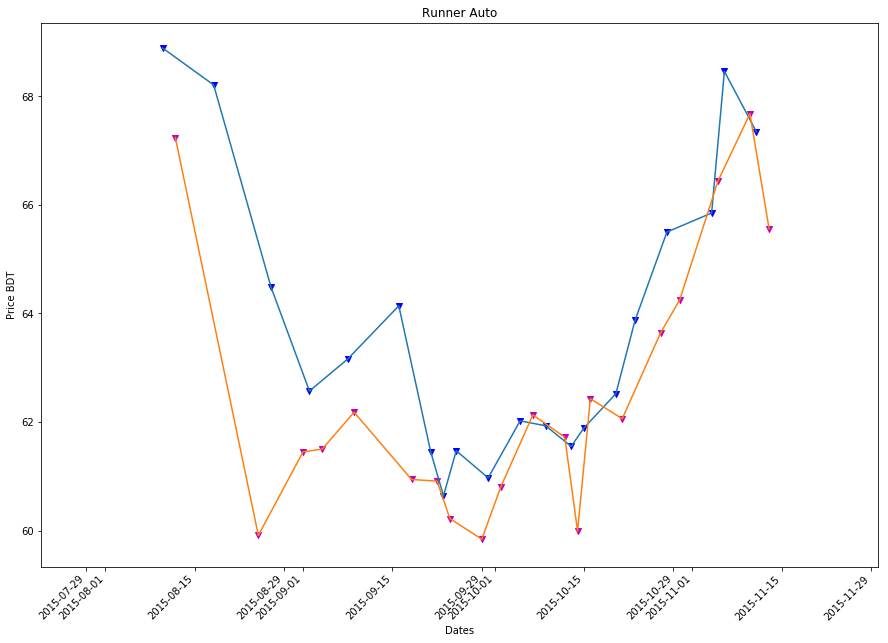

In [14]:
#df1=df[:50]

plt.figure(figsize=(15,10))
plt.scatter(np.array(df.loc[tp.index][40:60].index),np.array(df.loc[tp.index][40:60].Close.values),color='b',marker='v')
plt.scatter(np.array(df.loc[bt.index][40:60].index),np.array(df.loc[bt.index][40:60].Close.values),color='m',marker='v')
plt.plot(np.array(df.loc[tp.index][40:60].index),np.array(df.loc[tp.index][40:60].Close.values))
plt.plot(np.array(df.loc[bt.index][40:60].index),np.array(df.loc[bt.index][40:60].Close.values))

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.title('Runner Auto')
plt.xlabel('Dates')
plt.ylabel('Price BDT')
plt.show()

In [15]:
df.loc[bt.index][40:60].Close.values

array([67.23999786, 59.90999985, 61.45000076, 61.5       , 62.18000031,
       60.93999863, 60.90999985, 60.22000122, 59.84000015, 60.81000137,
       62.13000107, 61.72000122, 59.99000168, 62.43000031, 62.06000137,
       63.63999939, 64.25      , 66.44000244, 67.68000031, 65.55999756])

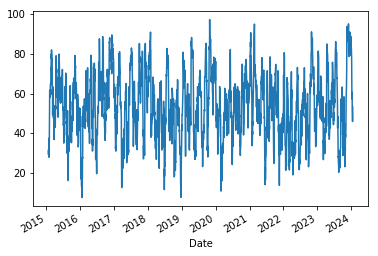

In [16]:
df['RSI'].plot()